In [2]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt

In [3]:


df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Preprocessing

<Axes: ylabel='age'>

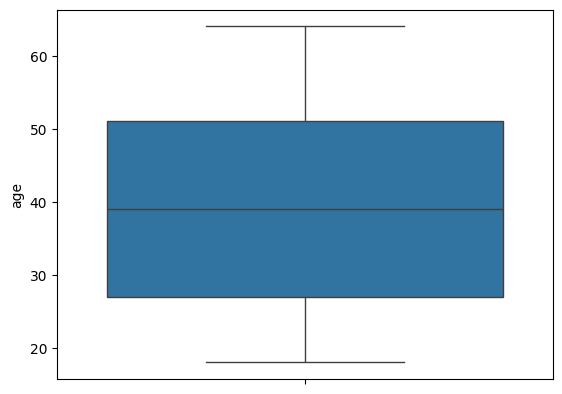

In [7]:


df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

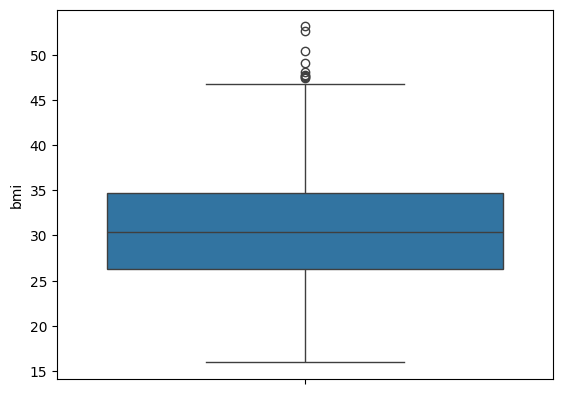

In [8]:
sns.boxplot(df['bmi'])

BMI OUTLIER REMOVAL

In [9]:

Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5 *iqr
upplim=Q3+1.5 *iqr
print(lowlim)
print(upplim)


13.674999999999994
47.31500000000001


<Axes: ylabel='bmi'>

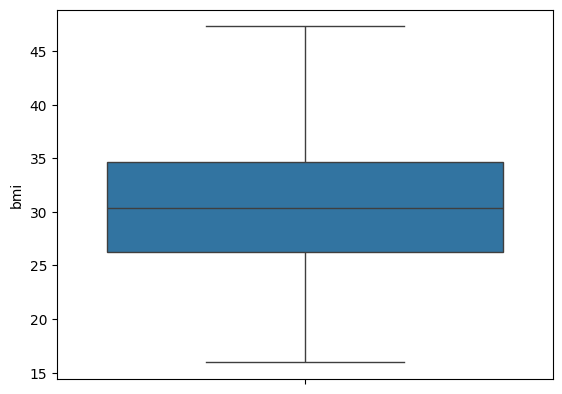

In [10]:


from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

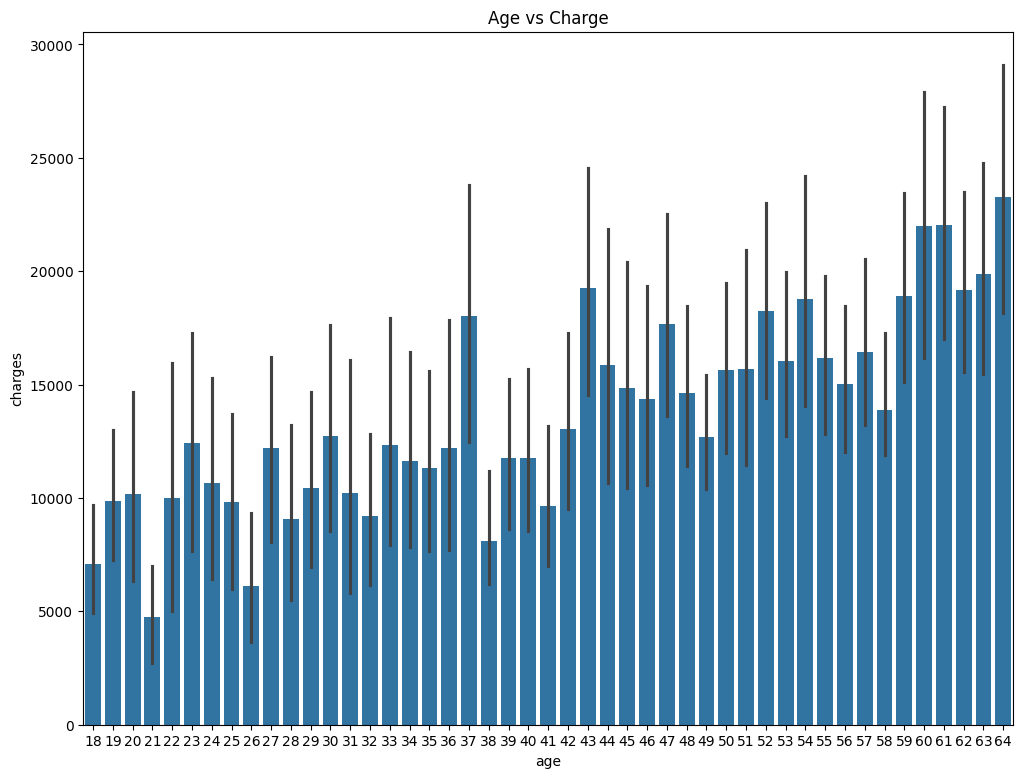

In [12]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df)

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

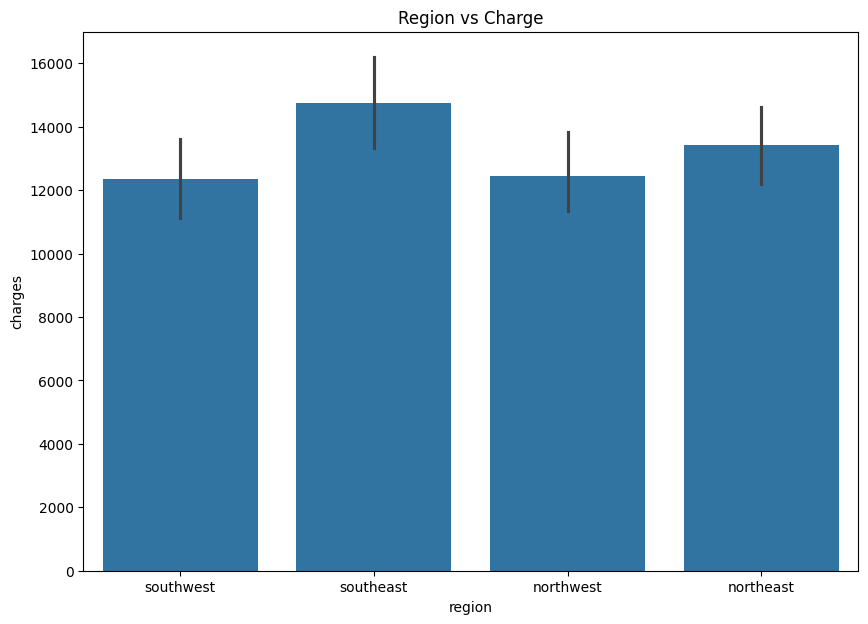

In [13]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=df)

Text(0.5, 1.0, 'BMI VS Charge')

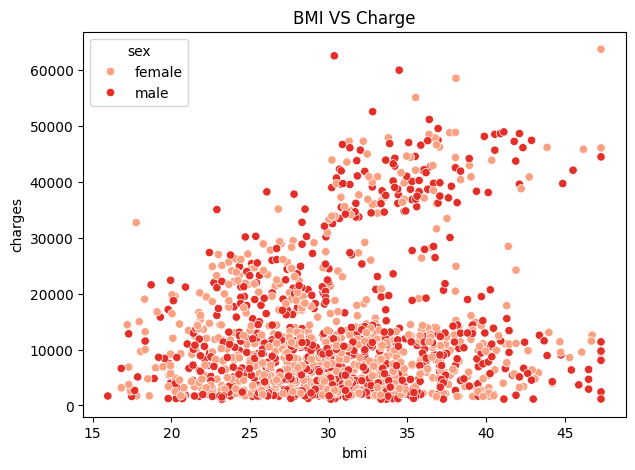

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Reds')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

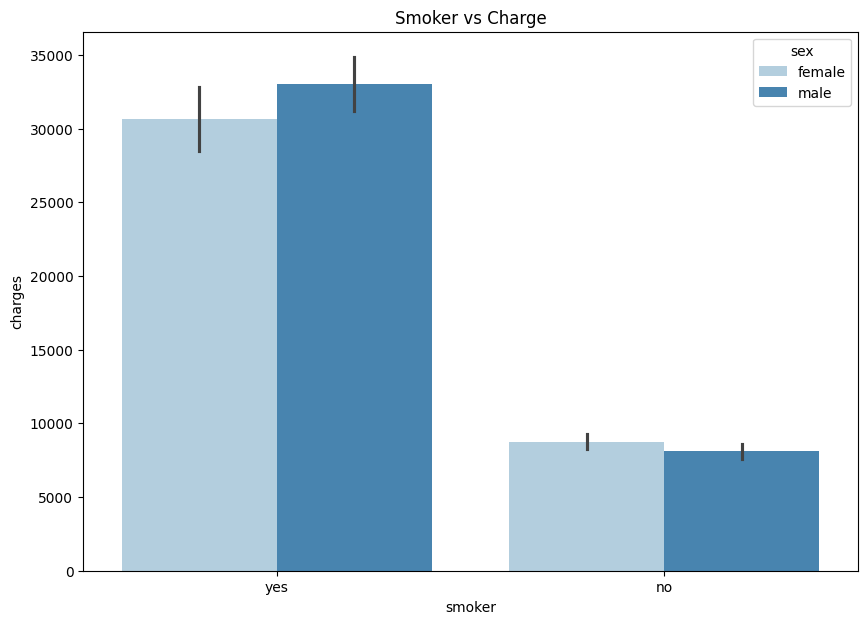

In [15]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='Blues',hue='sex')

C:\Users\Admin\AppData\Local\Temp\ipykernel_2364\1019648512.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex',y='charges',data=df,palette='Set1')


<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

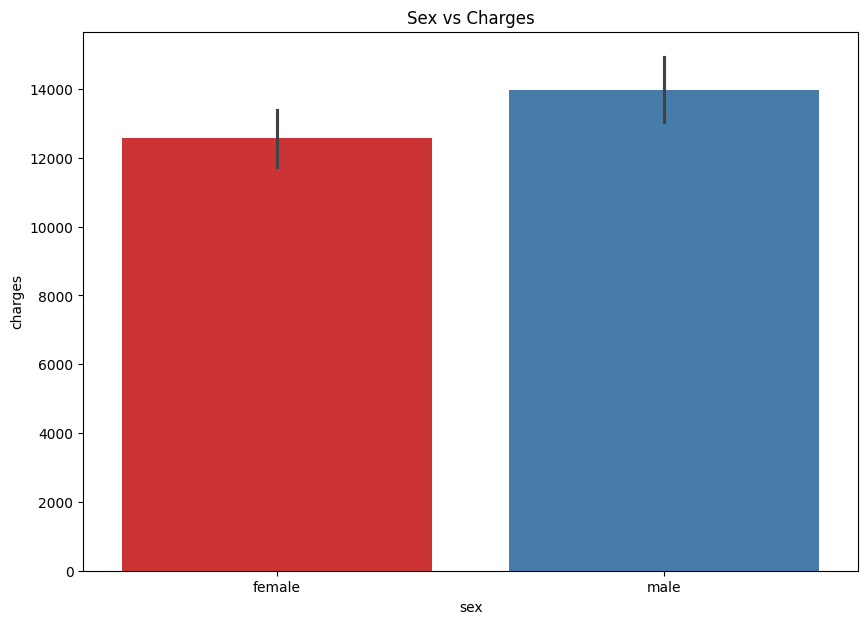

In [16]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=df,palette='Set1')

C:\Users\Admin\AppData\Local\Temp\ipykernel_2364\1070969163.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


Text(0, 0.5, 'Count')

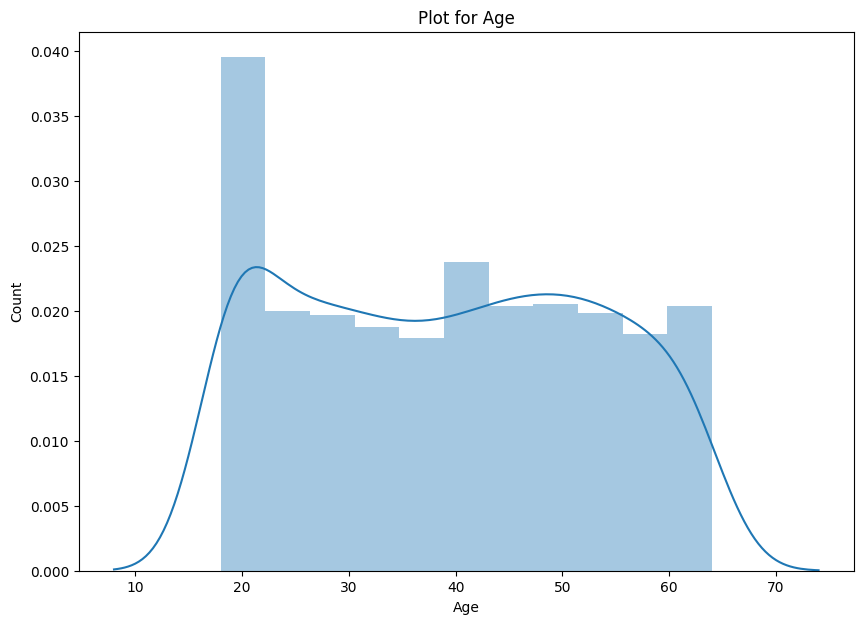

In [17]:
plt.figure(figsize=(10,7))
sns.distplot(df['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

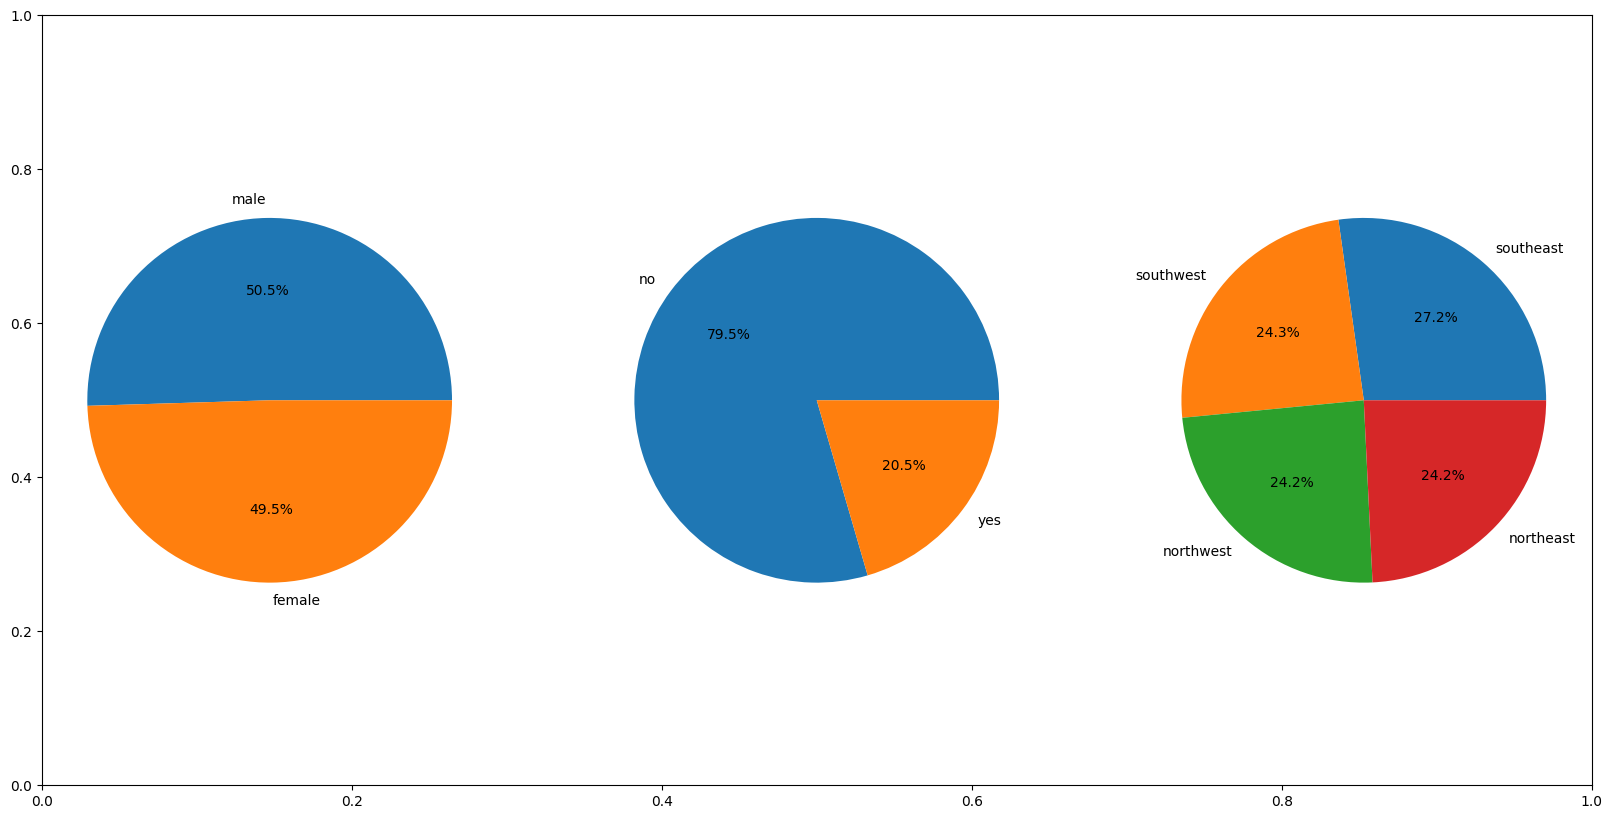

In [18]:
features = ['sex', 'smoker', 'region']
 
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
 
    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
 
plt.show()

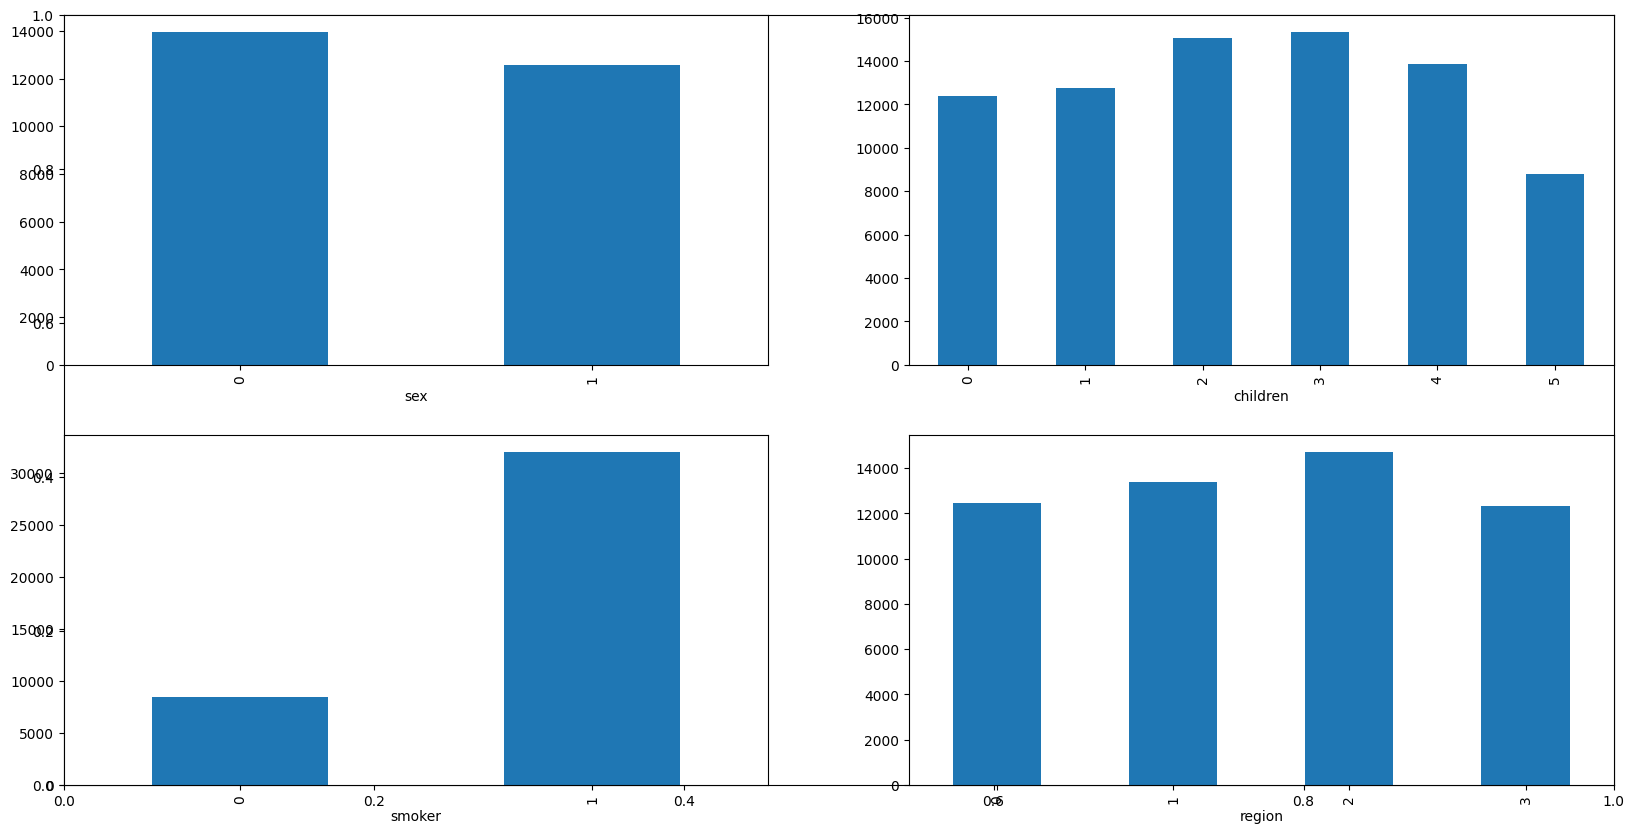

In [42]:
features = ['sex', 'children', 'smoker', 'region']
 
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()

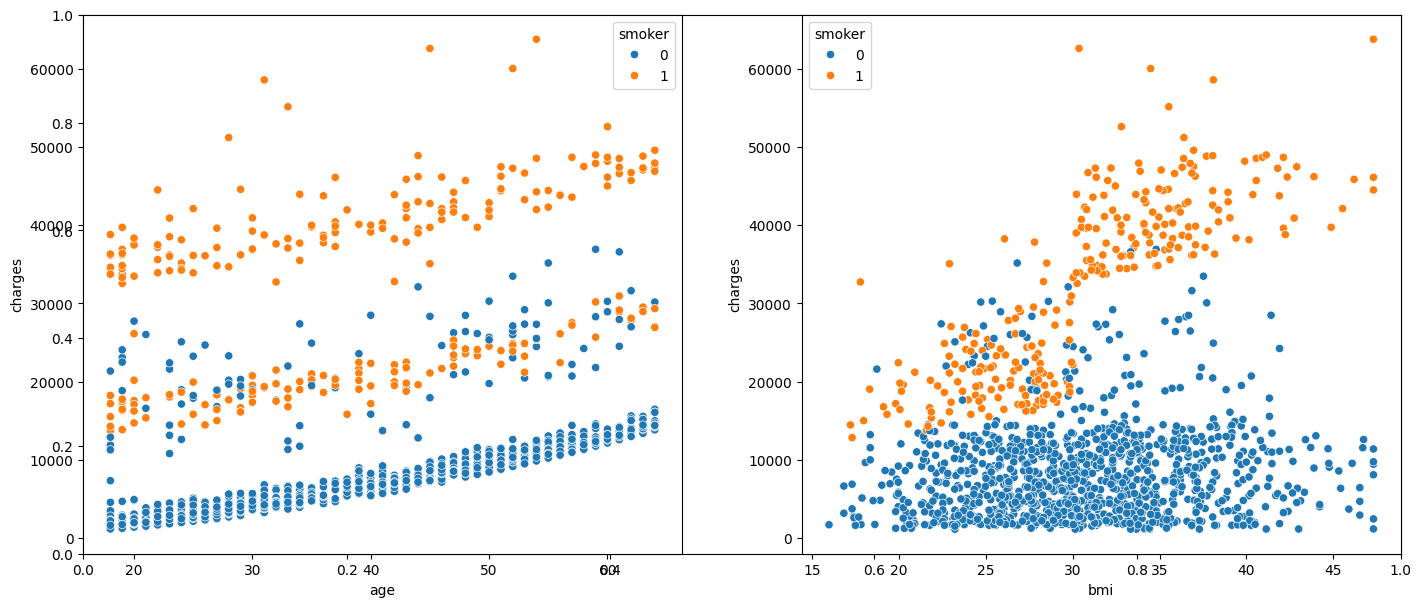

In [44]:
import seaborn
features = ['age', 'bmi']
 
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    seaborn.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2364\3951091123.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


Text(0, 0.5, 'Count')

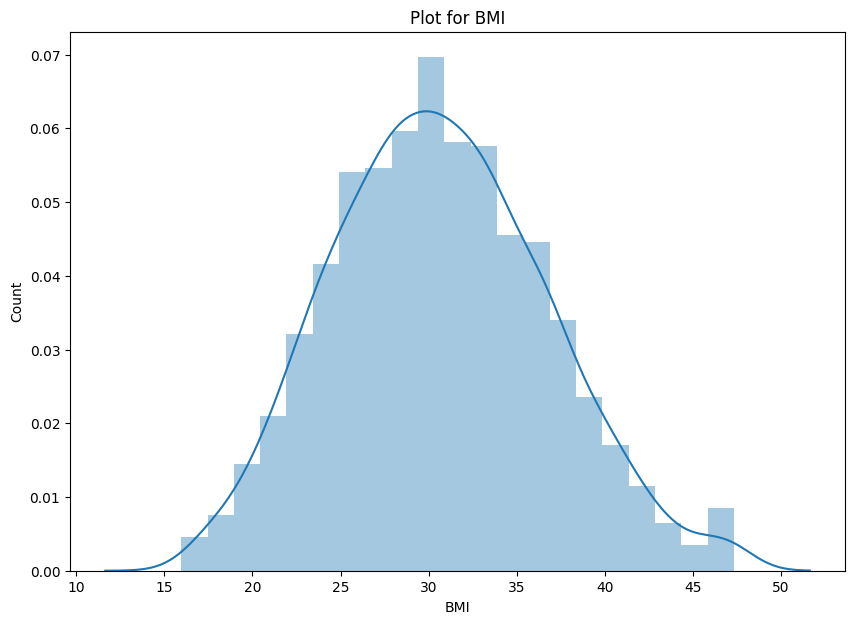

In [19]:
plt.figure(figsize=(10,7))
sns.distplot(df['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

C:\Users\Admin\AppData\Local\Temp\ipykernel_2364\1121222547.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


Text(0, 0.5, 'Count')

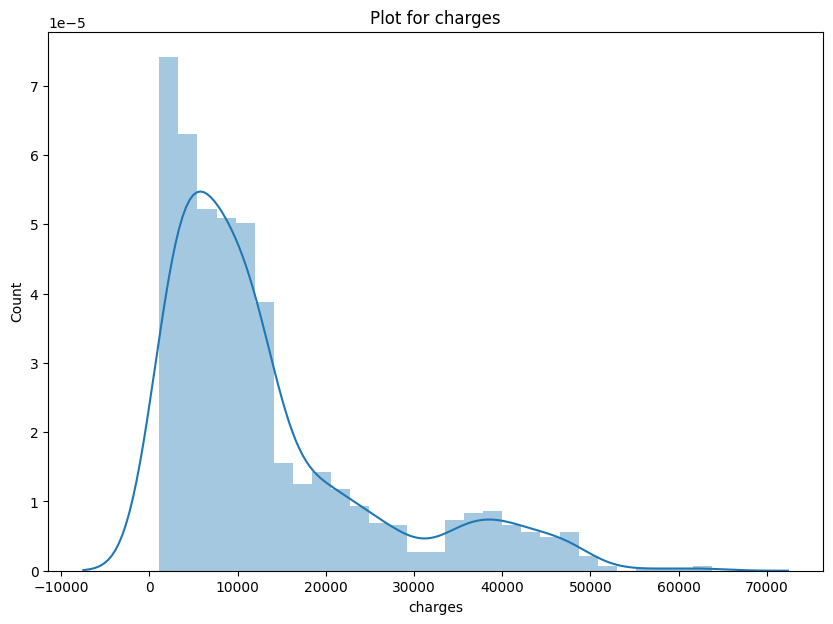

In [20]:
plt.figure(figsize=(10,7))
sns.distplot(df['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

Encoding

In [21]:


df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

X and Y values

In [22]:
import numpy as np

In [23]:


X=df.drop(['charges'],axis=1)
Y=df[['charges']]

In [24]:
Y= np.cbrt(df['charges'])

In [25]:
#Y = Y.to_numpy().ravel()


In [26]:
Y

0       25.654666
1       11.994331
2       16.447599
3       28.013799
4       15.695891
          ...    
1333    21.967271
1334    13.017690
1335    11.768318
1336    12.615872
1337    30.773007
Name: charges, Length: 1337, dtype: float64

In [27]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,0
4,32,0,28.880,0,0,0
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0
1334,18,1,31.920,0,0,1
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [30]:



xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)


RandomForestRegressor(random_state=42)

In [31]:
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)


In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:

mse_train = mean_absolute_error(ytrain, ypredtrain2)
mse_test = mean_absolute_error(ytest, ypredtest2)

print("MSE on training set:", mse_train)
print("MSE on test set:", mse_test)

MSE on training set: 0.6098846255593338
MSE on test set: 1.443518528442701


In [34]:
import pickle
pickle.dump(rfmodel,open('rfmodel.pkl','wb'))
rfmodel = pickle.load(open('rfmodel.pkl','rb'))

In [35]:
xn=np.array(df.loc[0, df.columns != 'charges'])

In [36]:
#X

In [37]:
X_reshaped = xn.reshape(1, -1)

# Now you can use the reshaped array for prediction
ypredtest2 = rfmodel.predict(X_reshaped)

ypredtest2

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([25.77764031])

In [38]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [39]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Initialize the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=Lasso(alpha=0.1),
    cv=5  # Number of folds in cross-validation
)

# Fit the stacking regressor
stacking_regressor.fit(xtrain,ytrain)



StackingRegressor(cv=5,
                  estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance...one,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=Lasso(alpha=0.1))

In [40]:
# Predict on the training set and the test set stacking regressor
ytrain_pred = stacking_regressor.predict(xtrain)
ytest_pred = stacking_regressor.predict(xtest)

mse_train = mean_absolute_error(ytrain, ytrain_pred)
mse_test = mean_absolute_error(ytest, ytest_pred)

print("MSE on training set:", mse_train)
print("MSE on test set:", mse_test)

MSE on training set: 0.6637593987647533
MSE on test set: 1.4426297969324082


In [41]:
import pickle
pickle.dump(stacking_regressor,open('stacking_regressor.pkl','wb'))
stacking_regressor = pickle.load(open('stacking_regressor.pkl','rb'))